In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd. read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head

<bound method NDFrame.head of         id  label                                              tweet
0        1      0  #fingerprint #Pregnancy Test https://goo.gl/h1...
1        2      0  Finally a transparant silicon case ^^ Thanks t...
2        3      0  We love this! Would you go? #talk #makememorie...
3        4      0  I'm wired I know I'm George I was made that wa...
4        5      1  What amazing service! Apple won't even talk to...
...    ...    ...                                                ...
7915  7916      0  Live out loud #lol #liveoutloud #selfie #smile...
7916  7917      0  We would like to wish you an amazing day! Make...
7917  7918      0  Helping my lovely 90 year old neighbor with he...
7918  7919      0  Finally got my #smart #pocket #wifi stay conne...
7919  7920      0  Apple Barcelona!!! #Apple #Store #BCN #Barcelo...

[7920 rows x 3 columns]>

In [4]:
data.head()


,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [5]:
data.shape

(7920, 3)

Text Prepocessing

In [7]:
import re
import string


Convert uppercase to lowercase

In [8]:
dataset["tweet"] = dataset["tweet"]. apply(lamda x:" ".join (x.lower() for x in x.split())

SyntaxError: invalid syntax. Perhaps you forgot a comma? (601693129.py, line 1)

In [9]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

Remove links

In [10]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [11]:
string.punctuation
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

Remove numbers

In [12]:
data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)

Remove stopwords

In [14]:
!pip install nltk


In [15]:
import nltk

In [16]:
nltk.download('stopwords',download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [17]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [18]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

Stemming

In [21]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [22]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

Building vocabulary

In [27]:
from collections import Counter
vocab = Counter()

In [28]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [29]:
len(vocab)

15949

In [30]:
tokens = [key for key in vocab if vocab[key] > 10]

In [31]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [33]:
len(tokens)

1145

In [34]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

Divide dataset

In [35]:
X = data['tweet']
y = data['label']

In [38]:
!pip install scikit-learn

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.2)

Vectorization

In [42]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [43]:
vectorized_x_train = vectorizer(X_train, tokens)
vectorized_x_test = vectorizer(X_test, tokens)

In [44]:
y_train.value_counts()

label
0    4715
1    1621
Name: count, dtype: int64

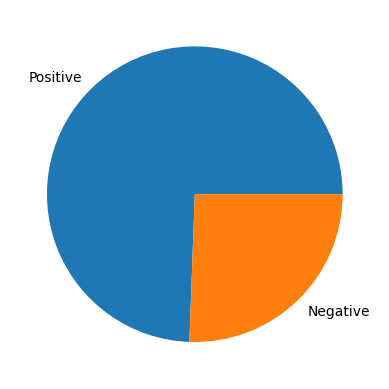

In [45]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [46]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/257.7 kB 1.3 MB/s eta 0:00:01
   -------------- ------------------------- 92.2/257.7 kB 1.1 MB/s eta 0:00:01
   --------------------------- ------------ 174.1/257.7 kB 1.3 MB/s eta 0:00:01
   ---------------------------------- ----- 225.3/257.7 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 257.7/257.7 kB 1.2 MB/s eta 0:00:00


In [47]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9430, 1145) (9430,)


In [48]:
y_train_smote.value_counts()

label
1    4715
0    4715
Name: count, dtype: int64

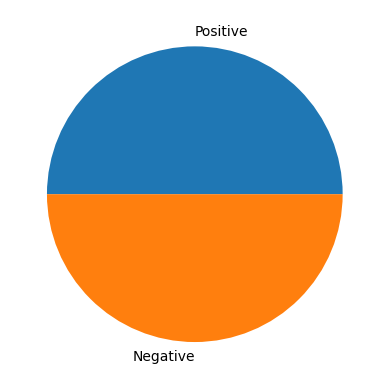

In [49]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

Model Training and Evaluation


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [51]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

Logistic Regression

In [60]:
lr= LogisticRegression()
lr.fit(vectorized_x_train_smote,y_train_smote)
y_train_pred = lr.predict(vectorized_x_train_smote)
training_scores(y_train_smote,y_train_pred)
y_test_pred = lr.predict(vectorized_x_test)
validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.942
	Precision = 0.918
	Recall = 0.971
	F1-Score = 0.944
Testing Scores:
	Accuracy = 0.863
	Precision = 0.701
	Recall = 0.81
	F1-Score = 0.751


Naive Bayes

In [61]:
mnb= MultinomialNB()
mnb.fit(vectorized_x_train_smote,y_train_smote)
y_train_pred = mnb.predict(vectorized_x_train_smote)
training_scores(y_train_smote,y_train_pred)
y_test_pred = mnb.predict(vectorized_x_test)
validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.91
	Precision = 0.871
	Recall = 0.962
	F1-Score = 0.915
Testing Scores:
	Accuracy = 0.859
	Precision = 0.665
	Recall = 0.906
	F1-Score = 0.767


Decision Tree

In [62]:
dt= DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote,y_train_smote)
y_train_pred = dt.predict(vectorized_x_train_smote)
training_scores(y_train_smote,y_train_pred)
y_test_pred = dt.predict(vectorized_x_test)
validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.824
	Precision = 0.662
	Recall = 0.637
	F1-Score = 0.649


Random Forest

In [63]:
rf= RandomForestClassifier()
rf.fit(vectorized_x_train_smote,y_train_smote)
y_train_pred = rf.predict(vectorized_x_train_smote)
training_scores(y_train_smote,y_train_pred)
y_test_pred = rf.predict(vectorized_x_test)
validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.86
	Precision = 0.743
	Recall = 0.694
	F1-Score = 0.718


Support Vector Machine

In [65]:
svm= SVC() 
svm.fit(vectorized_x_train_smote,y_train_smote)
y_train_pred = svm.predict(vectorized_x_train_smote)
training_scores(y_train_smote,y_train_pred) 
y_test_pred = svm.predict(vectorized_x_test) 
validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.979
	Precision = 0.963
	Recall = 0.997
	F1-Score = 0.98
Testing Scores:
	Accuracy = 0.868
	Precision = 0.723
	Recall = 0.785
	F1-Score = 0.753


In [66]:
import pickle 
with open('../static/model.pickle','wb') as file:
    pickle.dump(lr,file)